<a href="https://colab.research.google.com/github/bdpreom/bdpreom-covid19/blob/master/Covid_X_Ray_Images_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading all necerrasy Libraries

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchvision.models import inception_v3
from torch import optim
import os

### Checking out Folder's and Images

In [20]:
os.listdir('/content/drive/My Drive/coviddata')

['train', 'test', 'validation']

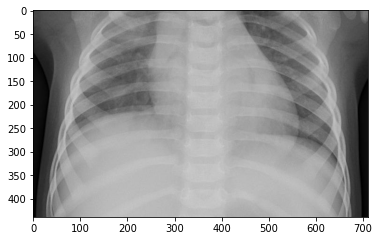

In [21]:
image = '/content/drive/My Drive/coviddata/train/positive/person1_bacteria_1.jpeg'
img = plt.imread(image)
plt.imshow(img, cmap='gray')

### Defining Transformation Criteria based on pretrained model's requirement

In [0]:
train_transform = transforms.Compose([transforms.Grayscale(num_output_channels=3), 
                                      transforms.Resize((299,299)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose([transforms.Grayscale(num_output_channels=3), 
                                     transforms.Resize((299,299)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [0]:
training_dataset = ImageFolder('/content/drive/My Drive/coviddata/train', transform=train_transform)
validation_dataset = ImageFolder('/content/drive/My Drive/coviddata/validation', transform=train_transform)
testing_dataset = ImageFolder('/content/drive/My Drive/coviddata/test', transform=test_transform )

In [0]:
len_train= len(training_dataset.samples)
len_test= len(testing_dataset.samples)
len_val= len(validation_dataset.samples)

In [25]:
print(len_train)
print(len_test)
print(len_val)

4629
624
45


### Loading Images to Dataloader

In [0]:
train_loader = DataLoader(dataset=training_dataset, batch_size=135, shuffle=True)
val_loader = DataLoader(dataset=validation_dataset, shuffle= True)
test_loader = DataLoader(dataset= testing_dataset, shuffle=False)

### Defining Pretrained Model and Twiking It for Desired Outputs

In [17]:
model = inception_v3(pretrained=True, aux_logits=False)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


In [27]:
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
for pram in model.parameters():
    pram.requires_grad = False

In [0]:
for pram in model.fc.parameters():
    pram.requires_grad = True

In [30]:
for pram in model.parameters():
    print(pram)

Streaming output truncated to the last 5000 lines.
        -0.3129, -0.5290, -0.4156, -0.7196, -0.5569, -0.6414, -0.3023, -0.8266,
        -0.1198, -0.7698, -0.8183, -0.5352, -0.2665, -0.1994, -0.6856, -0.2218,
        -0.8546, -0.6363, -0.4934, -0.1525, -0.5114, -0.7416, -0.3228, -0.9112,
        -0.4756, -0.9810, -0.6790, -0.3629, -0.5309, -0.7046, -0.1722, -0.3288,
        -0.6469, -0.5971, -0.7041, -0.2912, -0.8277, -0.4376, -0.6949, -0.7508,
        -0.4618, -0.7418, -0.7020, -0.3122, -0.4110, -0.3057, -0.1295, -0.5633,
        -0.0686, -0.5790, -0.8699, -0.2331, -1.0289, -0.4072, -0.6689, -0.4786,
        -0.3895, -0.0378, -0.4118, -0.5230, -0.5483, -0.4060, -0.4246, -0.1679,
        -0.4627, -0.8149, -0.3422, -0.6178, -0.5331, -0.9137, -0.6116, -0.6707,
        -0.2207, -0.7822, -0.5517, -0.4091, -0.0662, -0.7930, -0.7106, -0.1516])
Parameter containing:
tensor([[[[-0.0283, -0.0078, -0.0343,  ..., -0.0333, -0.0170, -0.0195]],

         [[-0.0192, -0.0083, -0.0100,  ..., -0.0106,

In [0]:
last_layer_input = model.fc.in_features

In [0]:
replaced_last_layer = nn.Linear(in_features=last_layer_input, out_features=2, bias=True)
model.fc = replaced_last_layer

In [33]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [34]:
torch.cuda.is_available()

True

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.01, weight_decay=0.01)

### Fittinfg and Evaluationg Model on Training and Testing Data

In [0]:
number_of_epoch = 15

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

In [37]:
for epoch in range(number_of_epoch):
    
    train_correct = 0
    test_correct = 0
    train_iter_loss = 0.0
    test_iter_loss = 0.0
    train_iteration = 0
    test_iteration = 0
    
    model.train()
    for data,label in train_loader:
        
        optimizer.zero_grad()
        data = data.to(device)
        label = label.to(device)
        
        pred = model(data)
        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()
        
        train_iter_loss += loss.item()
        train_iteration += 1
        
        _, predicted = torch.max(pred, 1)
        train_correct += (predicted == label).sum()
        
    train_loss.append(train_iter_loss/train_iteration)
    train_accuracy.append(100*float(train_correct)/len_train)
    
    model.eval()
    with torch.no_grad():
        for data,label in val_loader:
        
            data = data.to(device)
            label = label.to(device)
        
            pred = model(data)
            loss = loss_fn(pred, label)
        
            test_iter_loss += loss.item()
            test_iteration += 1
        
            _, predicted = torch.max(pred, 1)
            test_correct += (predicted == label).sum()
        
    test_loss.append(test_iter_loss/test_iteration)
    test_accuracy.append(100*float(test_correct)/len_val)
    
    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Validation Loss: {:.3f}, Validation Acc: {:.3f}'
           .format(epoch+1, number_of_epoch, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))

Epoch 1/15, Training Loss: 0.839, Training Accuracy: 79.434, Validation Loss: 1.716, Validation Acc: 24.444
Epoch 2/15, Training Loss: 0.312, Training Accuracy: 87.470, Validation Loss: 0.754, Validation Acc: 57.778
Epoch 3/15, Training Loss: 0.280, Training Accuracy: 88.399, Validation Loss: 1.026, Validation Acc: 51.111
Epoch 4/15, Training Loss: 0.282, Training Accuracy: 88.486, Validation Loss: 1.182, Validation Acc: 42.222
Epoch 5/15, Training Loss: 0.298, Training Accuracy: 88.097, Validation Loss: 0.521, Validation Acc: 71.111
Epoch 6/15, Training Loss: 0.257, Training Accuracy: 89.544, Validation Loss: 0.761, Validation Acc: 62.222
Epoch 7/15, Training Loss: 0.282, Training Accuracy: 88.939, Validation Loss: 0.877, Validation Acc: 60.000
Epoch 8/15, Training Loss: 0.270, Training Accuracy: 89.566, Validation Loss: 1.058, Validation Acc: 51.111
Epoch 9/15, Training Loss: 0.275, Training Accuracy: 88.788, Validation Loss: 0.534, Validation Acc: 66.667
Epoch 10/15, Training Loss: 

In [38]:
corrected = 0

model.eval()
for data, label in test_loader:
    data = data.to(device)
    label = label.to(device)
    
    pred = model(data)
    _, predicted = torch.max(pred, 1)
    
    corrected += (predicted == label).sum()
    
accuracy = 100 * float(corrected)/ len_test

print(f'Test accuracy is {accuracy :.3f}')

Test accuracy is 64.744


In [0]:
PATH = '/content/drive/My Drive/coviddata/covid19.pkl'
torch.save(model.state_dict(), PATH)